In [0]:
import sklearn as sk
from sklearn import tree
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
import pandas as pd
import numpy as np
import numpy.random as npr
import io
import matplotlib as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.distributions.empirical_distribution as ed

# Problem 1

In [0]:
# Get the data
iris = sk.datasets.load_iris()

# Append the target variable to the data
dataWithTarget = []
for i in range(len(iris.data)):
  g = iris.target_names[iris.target[i]]
  f = list(iris.data[i]) + [g]
  dataWithTarget.append(f)

# Make it a dataframe
irisDf = pd.DataFrame(dataWithTarget, columns=list(iris.feature_names) + ['Name'])

for i in range(1,6):
  print('Depth =', i)
  # Create the decision tree classifier with appropriate parameters
  dtc = sk.tree.DecisionTreeClassifier(max_depth = i, min_samples_split = 5, min_samples_leaf = 2)

  # Fit, Predict, and Score
  fi = dtc.fit(irisDf[iris.feature_names], irisDf['Name'])
  p = dtc.predict(irisDf[iris.feature_names])

  # get the metrics
  m = metrics.precision_recall_fscore_support(irisDf['Name'], p)

  # print out the metrics
  precision, recall, f_score, present_labels = m
  print('Class Label\t#\tPrec\tRecall\tF1')
  for t, l, p, r, f in zip(iris.target_names, present_labels, precision, recall, f_score):
    print('%s\t%s\t%.4lf\t%.4lf\t%.4lf' % (str.ljust(t, 9), l, p, r, f))

  print('\n\n')

Depth = 1
Class Label	#	Prec	Recall	F1
setosa   	50	1.0000	1.0000	1.0000
versicolor	50	0.5000	1.0000	0.6667
virginica	50	0.0000	0.0000	0.0000



Depth = 2
Class Label	#	Prec	Recall	F1
setosa   	50	1.0000	1.0000	1.0000
versicolor	50	0.9074	0.9800	0.9423
virginica	50	0.9783	0.9000	0.9375



Depth = 3
Class Label	#	Prec	Recall	F1
setosa   	50	1.0000	1.0000	1.0000
versicolor	50	0.9792	0.9400	0.9592
virginica	50	0.9423	0.9800	0.9608



Depth = 4
Class Label	#	Prec	Recall	F1
setosa   	50	1.0000	1.0000	1.0000
versicolor	50	0.9608	0.9800	0.9703
virginica	50	0.9796	0.9600	0.9697



Depth = 5
Class Label	#	Prec	Recall	F1
setosa   	50	1.0000	1.0000	1.0000
versicolor	50	0.9608	0.9800	0.9703
virginica	50	0.9796	0.9600	0.9697





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Write-Up

The depth value with the highest recall is 2. This is because a depth of 2 provides the right amount of complexity to correctly recognize the greatest number of positive classifications. The depth value with the lowest precision is 1. There is not enough model complexity to correctly distinguish positive classifications from negative ones. Depths of 4 and 5 were equally as good in terms of F1 scores. This is because lower recall and precision values result in a higher precision.

The micro method of score calculation sums up the individual true positives, false positives, and false negatives of the individual sets to examine the overall system. The macro method of score calculation averages the individual counts to examine the overall system. The weighted method is similar to the marco method but it takes an average weighed by the support of each label instead of just a naive average.

# Upload files for 2 and 3

In [75]:
# this code is used to load the data that was downloaded from UCI
# Both 'breast-cancer-wisconsin.data' and 'wdbc.data'
from google.colab import files
uploaded = files.upload()

Saving wdbc.data to wdbc.data
Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


# Problem 2

## Discrete, Entropy

              precision    recall  f1-score   support

           2       0.97      0.91      0.94       444
           4       0.86      0.95      0.90       239

    accuracy                           0.93       683
   macro avg       0.91      0.93      0.92       683
weighted avg       0.93      0.93      0.93       683

[[406  38]
 [ 12 227]]


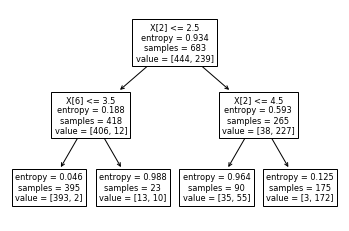

In [94]:
# get the CSV from the uploaded file, make into dataframe with the appropriate attribute names
# this is what was listed in the 'breast-cancer-wisconsin.names' file
features = ['Sample ID', 'Clump Thinkness', 'Cell Size Uniformity', 'Cell Shape Uniformity', 'Marginal Adhesion', 
           'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Target']
bcw = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin.data']), header=None)
bcw.columns = features

# Drop those samples that having a missing value (there are only 16 of them)
bcw = bcw.replace('?', np.nan)
bcw.dropna(0, 'any', inplace=True)

# Model the Decision Tree
dtc = sk.tree.DecisionTreeClassifier(criterion='entropy', max_depth = 2, min_samples_split = 5, min_samples_leaf = 2)
model = dtc.fit(bcw[features[:10]], bcw['Target'])
tree.plot_tree(model)

# Get Metrics
expected = bcw['Target']
predicted = model.predict(bcw[features[:10]])
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

## Discrete, Gini

              precision    recall  f1-score   support

           2       0.98      0.95      0.96       444
           4       0.92      0.96      0.94       239

    accuracy                           0.95       683
   macro avg       0.95      0.96      0.95       683
weighted avg       0.96      0.95      0.95       683

[[423  21]
 [ 10 229]]

TN    FP
FN    TP


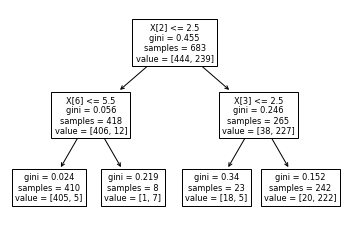

In [95]:
# Model the decision tree
dtc = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth = 2, min_samples_split = 5, min_samples_leaf = 2)
model = dtc.fit(bcw[features[:10]], bcw['Target'])
tree.plot_tree(model)

# Get Metrics
expected = bcw['Target']
predicted = model.predict(bcw[features[:10]])
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

print('\nTN    FP\nFN    TP')

## Write-Up

First, I removed the rows with missing values completely. Because this only accounted for small portion of the samples, I figured this would be the best way to deal with them.

NOTE: the misclassification error was calculated by hand
For the root node
- Entropy = 0.934
- Gini = 0.455
- Misclassification Error = 0.350

<br/>Information gain for first split = Impurity(parent) - Impurity(Weighted Children)
- Entropy: 0.589
- Gini: 0.325
- Misclassification Error: 0.276

The feature selection is **Cell Size Uniformity**, where the decision boundary is **2.5**

# Problem 3

## Before PCA, Gini

              precision    recall  f1-score   support

           B       0.93      0.97      0.95       357
           M       0.94      0.88      0.91       212

    accuracy                           0.93       569
   macro avg       0.94      0.92      0.93       569
weighted avg       0.94      0.93      0.93       569

[[346  11]
 [ 26 186]]

TN    FP
FN    TP


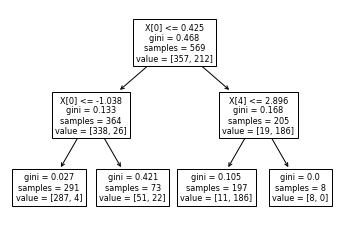

In [90]:
# get the CSV from the uploaded file, make into dataframe with the appropriate attribute names
# this is what was listed in the 'breast-cancer-wisconsin.names' file
features = ['Sample ID', 'Target', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 
            'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimention',  'Radius SE', 'Texture SE', 'Perimeter SE', 'Area SE', 'Smoothness SE', 
            'Compactness SE', 'Concavity SE', 'Concave Points SE', 'Symmetry SE', 'Fractal Dimension SE', 'Worst Radius', 'Worst Texture', 'Worst Perimeter', 
            'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity', 'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension']
bcw = pd.read_csv(io.BytesIO(uploaded['wdbc.data']), header=None)
bcw.columns = features

# remove those features which should not have an impact on the PCA
idNumbers = bcw['Sample ID']
bcwTarget = bcw['Target']
bcw.drop(['Sample ID', 'Target'], 1, inplace=True)

# Do Decision Tree with just the first principal component
dtc = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth = 2, min_samples_split = 5, min_samples_leaf = 2)
model = dtc.fit(np.array(principalDf).reshape(-1, 30), bcwTarget)
tree.plot_tree(model)

# Get Metrics
expected = bcwTarget
predicted = model.predict(np.array(principalDf).reshape(-1, 30))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

## PCA, 1 PC, Gini

              precision    recall  f1-score   support

           B       0.93      0.95      0.94       357
           M       0.91      0.88      0.89       212

    accuracy                           0.92       569
   macro avg       0.92      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569

[[338  19]
 [ 26 186]]

TN    FP
FN    TP


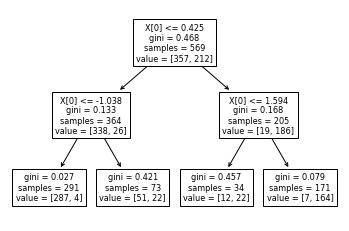

In [91]:
# Do PCA
standardBCW = StandardScaler().fit_transform(bcw) # standardize the data
pca = PCA() # get a pca object
principalComponents = pca.fit_transform(standardBCW) # perform the pca
# put the new principle components into a dataframe
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC_'+str(i) for i in range(len(principalComponents[0]))])

# Do Decision Tree with just the first principal component
dtc = sk.tree.DecisionTreeClassifier(criterion='gini', max_depth = 2, min_samples_split = 5, min_samples_leaf = 2)
model = dtc.fit(np.array(principalDf['PC_0']).reshape(-1, 1), bcwTarget)
tree.plot_tree(model)

# Get Metrics
expected = bcwTarget
predicted = model.predict(np.array(principalDf['PC_0']).reshape(-1, 1))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

## PCA, 2 PC, Gini

              precision    recall  f1-score   support

           B       0.91      0.97      0.94       357
           M       0.95      0.84      0.89       212

    accuracy                           0.92       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.93      0.92      0.92       569

[[348   9]
 [ 34 178]]

TN    FP
FN    TP


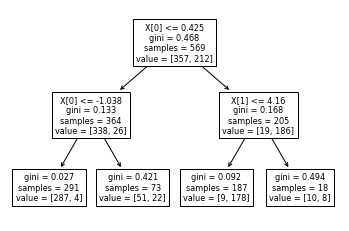

In [92]:
# Do Decision Tree with the first two principal components
model = dtc.fit(principalDf[['PC_0', 'PC_1']], bcwTarget)
tree.plot_tree(model)

# Get Metrics
expected = bcwTarget
predicted = model.predict(np.array(principalDf[['PC_0', 'PC_1']]).reshape(-1, 2))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

## Write-Up

Note: ‘M’ and ‘B’ we be interpretted in the confusion matrix as positive (malignant) and negative (benign), respectively.
<br/><br/>Discrete Data
- FP = 21
- TP = 229
- FPR = FP/(FP+TN) = 21/(21+423) = 0.047
- TPR = TP/(TP+FN) = 229/(229+10) = 0.958
<br/><br/>Before PCA
- FP = 11
- TP = 186
- FPR = FP/(FP+TN) = 11/(11+346) = 0.031
- TPR = TP/(TP+FN) = 186/(186+26) = 0.877
<br/><br/>After PCA, 1 PC
- FP = 19
- TP = 186
- FPR = FP/(FP+TN) = 19/(19+338) = 0.053
- TPR = TP/(TP+FN) = 186/(186+26) = 0.877
<br/><br/>After PCA, 2 PC
- FP = 9
- TP = 178
- FPR = FP/(FP+TN) = 9/(9+348) = 0.025
- TPR = TP/(TP+FN) = 178/(178+34) = 0.840
<br/><br/>No, using continuous data in this case did help improve the decision tree classification. Looking at the results from the discrete data, there was a higher true positive rate, albeit a higher false positive rate as well. This may not be detrimental though, since a slighly higher false positive rate is preferable to a slightly higher false negative rate. The F1, precision, and recall are all higher across the board compared to the continuous data, regardless of the PCA.


# Problem 4

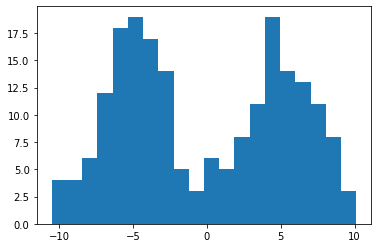

In [96]:
# Generate Data
a = npr.normal(5, 2, 100)
b = npr.normal(-5, 2, 100)
data = np.concatenate((one, two))
target = [1 for i in a]+[2 for i in b]

randomDf = pd.DataFrame({'Data': data, 'Target': target})

plt.pyplot.hist(data, bins=20)

# Build Decision Tree
dtc = sk.tree.DecisionTreeClassifier(max_depth = 2)
model = dtc.fit(randomDf[['Data']], randomDf['Target'])

[Text(167.4, 181.2, 'X[0] <= -0.783\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(83.7, 108.72, 'X[0] <= -1.449\ngini = 0.02\nsamples = 100\nvalue = [1, 99]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 97\nvalue = [0, 97]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(251.10000000000002, 108.72, 'X[0] <= -0.053\ngini = 0.02\nsamples = 100\nvalue = [99, 1]'),
 Text(209.25, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 97\nvalue = [97, 0]')]

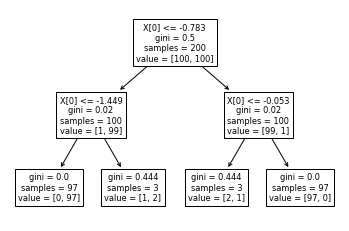

In [97]:
tree.plot_tree(model)

0.5


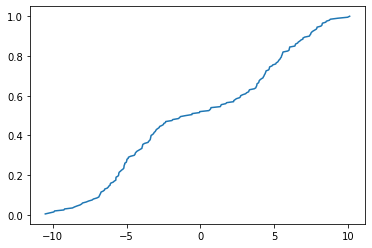

In [109]:
ecdf = ed.ECDF(randomDf['Data'])
print(ecdf(-0.783)) # enter the threshold value of the first split
plt.pyplot.plot(ecdf.x, ecdf.y)

## Write-Up

Threshold for first split: -0.783
<br/>Looking at the empirical distribution of the data, the empirical distribution is exactly 0.5 atthe threshold value of -0.783. This is not a coincidence. That threshold value was chosen by the decision tree because that happens to be the center point between the two standard deviations in terms of number of samples. From there on, the tree will go on to split the overlapping samples accordingly. 
